In [1]:
# Script for testing our model on real (non-synthetic) image data.

In [3]:
# from tensorflow import keras 
# from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
import h5py
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from tensorflow.keras import backend as K


In [1]:
# Define jaccard and dice coefficient metric
smooth_j = 1e-12
smooth_d = 1

def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])
    jac = (intersection + smooth_j) / (sum_ - intersection + smooth_j)
    return K.mean(jac)

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth_d) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f) + smooth_d)
  
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)  

In [4]:
# Load complete model w weights.
K.clear_session()

model = keras.models.load_model('/iahome/d/dm/dmattioli/Documents/IE6380_Project/unet.h5',
                                custom_objects={'jaccard_coef': jaccard_coef, 'dice_coef':
                                                dice_coef, 'dice_coef_loss': dice_coef_loss})



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
## Testing on DHS (Actual Hip Surgery Images) Images.
# Load real images, store the model's prediction for each.

dir = "/iahome/d/dm/dmattioli/Documents/IE6380_Project/data/Wire_Detection/synthetic/xTrain" #synthetic
# dir = "/iahome/d/dm/dmattioli/Documents/IE6380_Project/data/Wire_Detection/validation/xTrain" #validation

validation_images = []
predictions = []
for root, dirs, files in os.walk(dir):
    for name in files[:100]: # only get first 100 images
        img = cv2.imread(os.path.join(root, name), -1)/255
        img_pred = np.expand_dims(img, axis=2)
        
        if img is not None:
            validation_images.append(img) # append image to the stack
            pred = model.predict(np.expand_dims(img_pred, axis=0))
            print(pred)
            predictions.append(pred)
            
np.array(validation_images).shape
# np.array(predictions).shape

[[[[0.03474015]
   [0.0183191 ]
   [0.00834402]
   ...
   [0.01475334]
   [0.01667404]
   [0.02068853]]

  [[0.01914716]
   [0.0284301 ]
   [0.01601961]
   ...
   [0.01011738]
   [0.00868741]
   [0.00878587]]

  [[0.0247179 ]
   [0.02859971]
   [0.01591694]
   ...
   [0.01214302]
   [0.01463059]
   [0.01032445]]

  ...

  [[0.03404602]
   [0.00909546]
   [0.0018253 ]
   ...
   [0.0256314 ]
   [0.03618038]
   [0.01859421]]

  [[0.04077601]
   [0.00816718]
   [0.0016498 ]
   ...
   [0.04125252]
   [0.0372982 ]
   [0.02030826]]

  [[0.08406174]
   [0.02985516]
   [0.0072116 ]
   ...
   [0.02976102]
   [0.04028368]
   [0.02541122]]]]
[[[[0.03474015]
   [0.0183191 ]
   [0.00834402]
   ...
   [0.01475334]
   [0.01667404]
   [0.02068853]]

  [[0.01914716]
   [0.0284301 ]
   [0.01601961]
   ...
   [0.01011738]
   [0.00868741]
   [0.00878587]]

  [[0.0247179 ]
   [0.02859971]
   [0.01591694]
   ...
   [0.01214302]
   [0.01463059]
   [0.01032445]]

  ...

  [[0.03404602]
   [0.00909546]
   [0.00

[[[[2.1706283e-02]
   [7.8537762e-03]
   [1.3375878e-03]
   ...
   [3.4034252e-05]
   [1.4913082e-04]
   [1.1354983e-03]]

  [[5.7650506e-03]
   [1.8256903e-04]
   [8.4936619e-06]
   ...
   [8.6426735e-07]
   [1.1622906e-05]
   [1.5804172e-04]]

  [[4.7907829e-03]
   [2.0295382e-05]
   [6.2584877e-07]
   ...
   [7.7486038e-07]
   [4.6789646e-06]
   [8.1896782e-05]]

  ...

  [[1.4531612e-02]
   [2.9191077e-03]
   [3.6895275e-04]
   ...
   [5.3644180e-06]
   [2.6524067e-06]
   [1.6301870e-05]]

  [[2.6357204e-02]
   [9.6251070e-03]
   [2.0342469e-03]
   ...
   [3.0696392e-05]
   [1.5556812e-05]
   [7.0124865e-05]]

  [[7.5510770e-02]
   [3.7734658e-02]
   [1.5930951e-02]
   ...
   [1.0991096e-03]
   [3.5706162e-04]
   [2.9525161e-04]]]]
[[[[1.8988341e-02]
   [7.0653558e-03]
   [1.2185574e-03]
   ...
   [3.4034252e-05]
   [1.4913082e-04]
   [1.1354983e-03]]

  [[4.8539340e-03]
   [1.5893579e-04]
   [7.3611736e-06]
   ...
   [8.6426735e-07]
   [1.1622906e-05]
   [1.5804172e-04]]

  [[3.74

[[[[4.5722723e-04]
   [3.6209822e-05]
   [3.5464764e-06]
   ...
   [4.4286251e-05]
   [8.6665154e-05]
   [3.2776594e-04]]

  [[3.8623810e-05]
   [3.2782555e-07]
   [8.9406967e-08]
   ...
   [5.6028366e-06]
   [4.5597553e-06]
   [2.1696091e-05]]

  [[2.4199486e-05]
   [4.1723251e-07]
   [5.9604645e-08]
   ...
   [4.0531158e-06]
   [1.5497208e-06]
   [5.2452087e-06]]

  ...

  [[8.9555979e-05]
   [3.1292439e-06]
   [4.7683716e-07]
   ...
   [4.6206087e-02]
   [6.6628277e-02]
   [6.0812533e-02]]

  [[5.0330162e-04]
   [4.5388937e-05]
   [5.4538250e-06]
   ...
   [6.6490650e-02]
   [7.0754915e-02]
   [5.3734601e-02]]

  [[2.9050708e-03]
   [4.6688318e-04]
   [1.2040138e-04]
   ...
   [5.3949922e-02]
   [6.6011012e-02]
   [4.6703786e-02]]]]
[[[[0.03476939]
   [0.02020285]
   [0.01022598]
   ...
   [0.00745648]
   [0.00849456]
   [0.009343  ]]

  [[0.02225682]
   [0.02782461]
   [0.02426103]
   ...
   [0.00707451]
   [0.00391889]
   [0.00465438]]

  [[0.02269   ]
   [0.02392277]
   [0.019163

[[[[0.03476939]
   [0.02020285]
   [0.01022598]
   ...
   [0.00745648]
   [0.00849456]
   [0.009343  ]]

  [[0.02225682]
   [0.02782461]
   [0.02426103]
   ...
   [0.00707451]
   [0.00391889]
   [0.00465438]]

  [[0.02269   ]
   [0.02392277]
   [0.01916361]
   ...
   [0.00780141]
   [0.00661436]
   [0.0084832 ]]

  ...

  [[0.02228135]
   [0.01838502]
   [0.01670226]
   ...
   [0.03018081]
   [0.03866997]
   [0.02874863]]

  [[0.03244278]
   [0.030108  ]
   [0.02257031]
   ...
   [0.04599255]
   [0.0516822 ]
   [0.03178906]]

  [[0.05253369]
   [0.03069848]
   [0.01927173]
   ...
   [0.04174399]
   [0.05530733]
   [0.0395146 ]]]]
[[[[2.8220147e-02]
   [1.4326006e-02]
   [7.2916448e-03]
   ...
   [4.1463971e-04]
   [1.3455749e-04]
   [5.1525235e-04]]

  [[1.7973006e-02]
   [2.2816509e-02]
   [1.8768579e-02]
   ...
   [5.2320957e-04]
   [2.5168061e-04]
   [5.4520369e-04]]

  [[1.8505752e-02]
   [2.2087604e-02]
   [1.5591443e-02]
   ...
   [1.8697977e-04]
   [3.9577484e-05]
   [7.4088573e

[[[[0.02042019]
   [0.01034066]
   [0.0057523 ]
   ...
   [0.01476678]
   [0.01666167]
   [0.01932123]]

  [[0.02122664]
   [0.02015668]
   [0.02258164]
   ...
   [0.01898831]
   [0.01342908]
   [0.01572543]]

  [[0.01917213]
   [0.01936013]
   [0.01658332]
   ...
   [0.02378771]
   [0.02626824]
   [0.02287817]]

  ...

  [[0.01050684]
   [0.0067175 ]
   [0.00466162]
   ...
   [0.01409763]
   [0.02628705]
   [0.01969975]]

  [[0.02334332]
   [0.01450065]
   [0.01061818]
   ...
   [0.02387515]
   [0.03402758]
   [0.0229342 ]]

  [[0.04980564]
   [0.02373469]
   [0.0135895 ]
   ...
   [0.02303883]
   [0.03558537]
   [0.02658874]]]]
[[[[0.02042019]
   [0.01034066]
   [0.0057523 ]
   ...
   [0.02509344]
   [0.03127789]
   [0.03834668]]

  [[0.02122664]
   [0.02015668]
   [0.02258164]
   ...
   [0.025956  ]
   [0.02190405]
   [0.02818191]]

  [[0.01917213]
   [0.01936013]
   [0.01658332]
   ...
   [0.02358127]
   [0.02644944]
   [0.03170466]]

  ...

  [[0.01030451]
   [0.00521693]
   [0.00

[[[[8.1127882e-04]
   [1.1971593e-04]
   [9.4771385e-06]
   ...
   [1.5466511e-03]
   [3.3918917e-03]
   [4.1334629e-03]]

  [[8.7141991e-05]
   [2.2351742e-06]
   [1.7881393e-07]
   ...
   [9.6529722e-05]
   [2.1940470e-04]
   [3.3485889e-04]]

  [[5.8442354e-05]
   [2.1755695e-06]
   [5.9604645e-08]
   ...
   [2.5063753e-05]
   [7.1376562e-05]
   [1.9517541e-04]]

  ...

  [[5.8025420e-03]
   [2.1838248e-03]
   [1.0013580e-03]
   ...
   [1.2618303e-04]
   [1.2743473e-04]
   [2.9477477e-04]]

  [[1.1333168e-02]
   [6.4532757e-03]
   [3.0000806e-03]
   ...
   [7.1874261e-04]
   [7.5381994e-04]
   [1.8948913e-03]]

  [[2.8253675e-02]
   [1.1367172e-02]
   [5.3402185e-03]
   ...
   [7.3681772e-03]
   [1.0800660e-02]
   [1.2005240e-02]]]]
[[[[1.1680722e-03]
   [1.4996529e-04]
   [1.4573336e-05]
   ...
   [1.5466511e-03]
   [3.3918917e-03]
   [4.1334629e-03]]

  [[1.2859702e-04]
   [3.5166740e-06]
   [2.3841858e-07]
   ...
   [9.6529722e-05]
   [2.1940470e-04]
   [3.3485889e-04]]

  [[9.17

[[[[5.1703751e-03]
   [1.9051731e-03]
   [2.7358532e-04]
   ...
   [4.2021275e-06]
   [2.5838614e-05]
   [9.3787909e-05]]

  [[1.3381839e-03]
   [2.4724007e-04]
   [4.2140484e-05]
   ...
   [5.9604645e-08]
   [3.2782555e-07]
   [1.9073486e-06]]

  [[7.1227551e-04]
   [1.3616681e-04]
   [1.8954277e-05]
   ...
   [3.5762787e-07]
   [2.6822090e-07]
   [7.7486038e-07]]

  ...

  [[5.3415000e-03]
   [4.5505166e-04]
   [8.3178282e-05]
   ...
   [1.2207031e-04]
   [9.5695257e-05]
   [1.2254715e-04]]

  [[2.1627247e-02]
   [2.1597743e-03]
   [3.7372112e-04]
   ...
   [2.8470159e-04]
   [2.5519729e-04]
   [5.5459142e-04]]

  [[6.4410418e-02]
   [1.6183138e-02]
   [5.9588850e-03]
   ...
   [2.3511648e-03]
   [2.6597381e-03]
   [3.3421516e-03]]]]
[[[[5.1715076e-03]
   [1.9055009e-03]
   [2.7364492e-04]
   ...
   [4.2021275e-06]
   [2.5838614e-05]
   [9.3787909e-05]]

  [[1.3385415e-03]
   [2.4718046e-04]
   [4.2140484e-05]
   ...
   [5.9604645e-08]
   [3.2782555e-07]
   [1.9073486e-06]]

  [[7.12

[[[[2.93514132e-03]
   [1.84682012e-03]
   [1.62976980e-03]
   ...
   [6.85453415e-07]
   [1.99675560e-06]
   [1.37686729e-05]]

  [[1.51246786e-04]
   [1.12354755e-05]
   [4.33921814e-05]
   ...
   [2.98023224e-08]
   [0.00000000e+00]
   [1.78813934e-07]]

  [[5.32567501e-05]
   [1.78813934e-06]
   [1.78813934e-06]
   ...
   [5.96046448e-08]
   [2.98023224e-08]
   [8.94069672e-08]]

  ...

  [[1.07624531e-02]
   [5.14084101e-03]
   [1.72179937e-03]
   ...
   [3.59383225e-03]
   [3.96659970e-03]
   [3.72841954e-03]]

  [[2.18344629e-02]
   [1.35800838e-02]
   [4.99945879e-03]
   ...
   [8.44237208e-03]
   [9.40942764e-03]
   [9.39807296e-03]]

  [[4.66437936e-02]
   [2.27121115e-02]
   [1.01351142e-02]
   ...
   [1.31565630e-02]
   [1.87004209e-02]
   [1.09831691e-02]]]]
[[[[4.1213930e-03]
   [2.4265945e-03]
   [1.9237697e-03]
   ...
   [6.8545341e-07]
   [1.9967556e-06]
   [1.3768673e-05]]

  [[2.0956993e-04]
   [1.5944242e-05]
   [6.1899424e-05]
   ...
   [2.9802322e-08]
   [0.000000

[[[[2.59131193e-04]
   [9.80496407e-06]
   [1.99675560e-06]
   ...
   [5.54323196e-06]
   [2.05338001e-05]
   [1.08122826e-04]]

  [[3.10838223e-05]
   [7.45058060e-07]
   [3.27825546e-07]
   ...
   [1.49011612e-07]
   [2.08616257e-07]
   [1.66893005e-06]]

  [[1.91032887e-05]
   [8.94069672e-07]
   [1.69873238e-06]
   ...
   [3.57627869e-07]
   [1.49011612e-07]
   [5.36441803e-07]]

  ...

  [[2.16394663e-04]
   [8.28504562e-06]
   [5.60283661e-06]
   ...
   [5.41806221e-05]
   [2.96235085e-05]
   [2.37524509e-05]]

  [[1.16041303e-03]
   [5.35249710e-05]
   [1.29640102e-05]
   ...
   [8.03768635e-05]
   [5.41210175e-05]
   [6.31511211e-05]]

  [[9.97030735e-03]
   [8.11725855e-04]
   [1.50382519e-04]
   ...
   [4.71740961e-04]
   [4.92155552e-04]
   [4.12166119e-04]]]]
[[[[2.59131193e-04]
   [9.80496407e-06]
   [1.96695328e-06]
   ...
   [5.54323196e-06]
   [2.05338001e-05]
   [1.08122826e-04]]

  [[3.10838223e-05]
   [7.45058060e-07]
   [3.27825546e-07]
   ...
   [1.49011612e-07]
  

(100, 256, 256)

(256, 256)
(256, 256)


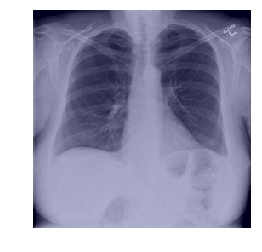

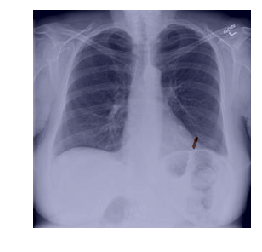

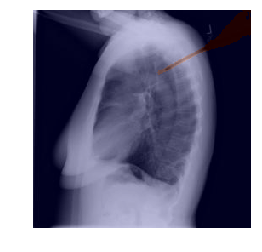

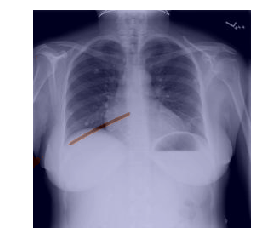

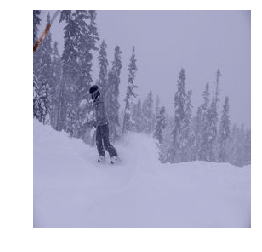

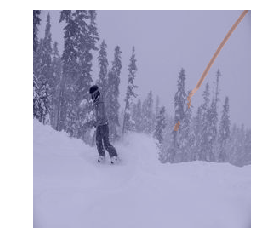

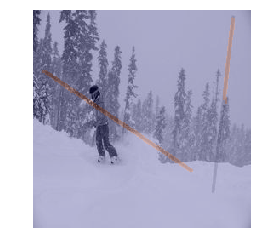

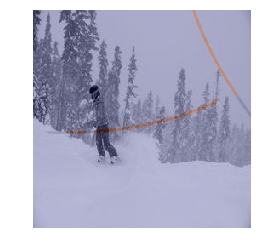

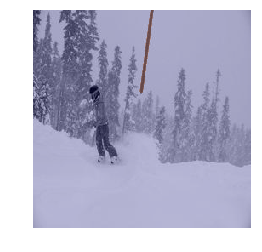

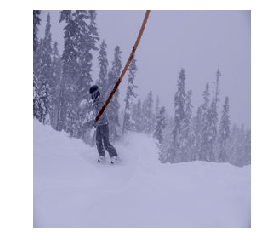

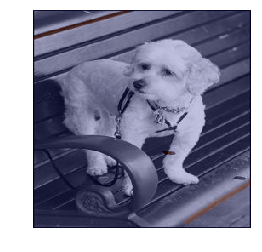

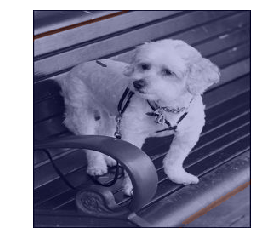

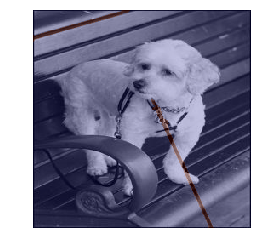

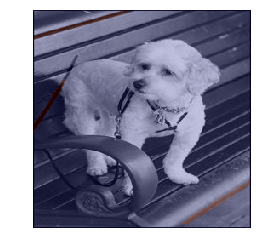

In [12]:
# Get random index from image data set.
# N = np.array(validation_images).shape[0]
# ind = list(range(0, N))
# random.shuffle(ind)
# rand_ind = ind[:N]
N = 0
img = validation_images[4]

mask = np.squeeze(predictions[N] > 0.90).astype("float32")
print(img.shape)
print(mask.shape)

for i in range(N,N+14):
    img = validation_images[i]
    mask = np.squeeze(predictions[i] > 0.1).astype("float32")
    
    plt.figure()
    plt.imshow(img, 'gray')
    plt.imshow(mask, cmap='jet', interpolation ='none', alpha=0.25)
    plt.axis('off')
    plt.savefig('/iahome/d/dm/dmattioli/Documents/IE6380_Project/' + 'val' + str(i) + '.png', bbox_inches='tight')
#     fig, axs = plt.subplots(1,2, figsize=(20, 15), facecolor='w', edgecolor='k')
#     fig.subplots_adjust(hspace = .5, wspace=.001)
#     axs = axs.ravel()
#     axs[0].imshow(img)
#     axs[1].imshow(mask, alpha=0.5)


In [ ]:
## Show histogram of predictions.
#predictions = np.random.normal(0.85, scale=0.05, size=(len(files), 1))

f0, ax0 = plt.subplots()
n, bins, patches = ax0.hist(predictions, bins=51, range=(0.0, 1.0))
ax0.set_title("Prediction values")
ax0.set_xlabel('Prediction')
ax0.set_xticks(np.linspace(0.0, 1.0, 11))
ax0.minorticks_on
ax0.set_ylabel('# of Images')
ax0.grid(b=bool)


In [ ]:
## Select 6 random images to show.
# Random indices.
N = 6
ind = list(range(0, len(files)))
random.shuffle(ind)
rand_ind = ind[:N]

# Create figure w suplots.
fig, axs = plt.subplots(2,3, figsize=(20, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(N):
    axs[i].imshow(real_images[rand_ind[i]])
    axs[i].axis('off')
    predVal = predictions[i]*100
    axs[i].set_title('Confidence = %f' % predVal + '%')
